# Analiza wyników dotyczących wulkanizmu ziemskiego w epoce holocenu
## Analiza wyników zadań z zestawu

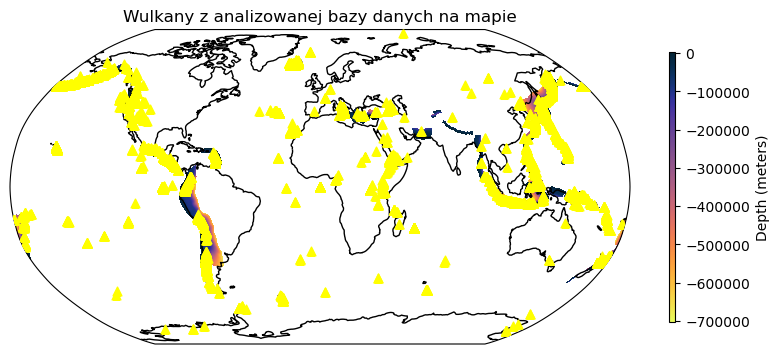

In [2]:
import rockhound as rh
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs
import pandas as pd
from rockhound.slab2 import ZONES

eruptions_data=pd.read_csv("raw_data.csv", skiprows = 1)

subduction_zones = []
for zone in ZONES:
    subduction_zones.append(rh.fetch_slab2(zone))

vmax = max([grid.depth.actual_range[1] for grid in subduction_zones])
vmin = min([grid.depth.actual_range[0] for grid in subduction_zones])

plt.figure(figsize = (10, 5))
ax = plt.axes(projection = ccrs.Robinson())
for grid in subduction_zones:
    pc = grid.depth.plot.pcolormesh(
        cmap = cmocean.cm.thermal_r,
        ax = ax,
        transform = ccrs.PlateCarree(),
        add_colorbar = False,
        vmin = vmin,
        vmax = vmax,
    )
plt.colorbar(
    pc,
    ax=ax,
    label = "Depth (meters)",
    pad = 0.05,
    aspect = 40,
    shrink = 0.7,
    orientation = "vertical",
)
ax.scatter(
   eruptions_data['Longitude'],
   eruptions_data['Latitude'],
   s = 40,
   c = 'yellow',
   marker = '^',
   transform = ccrs.PlateCarree(),
   zorder = 3
)

ax.set_title("Wulkany z analizowanej bazy danych na mapie")
ax.set_global()
ax.coastlines()

plt.show()

### Największe erupcje

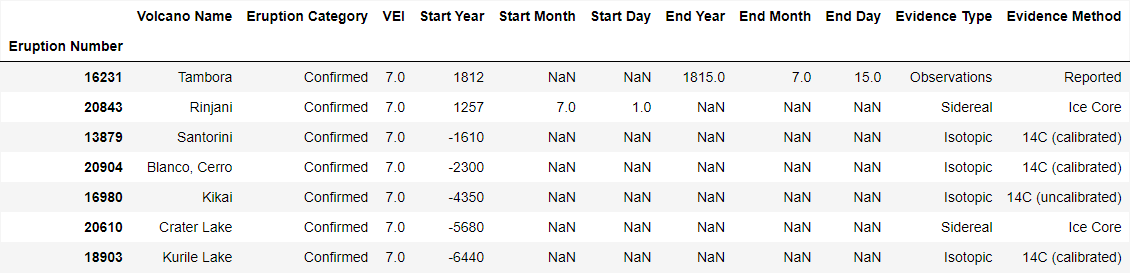

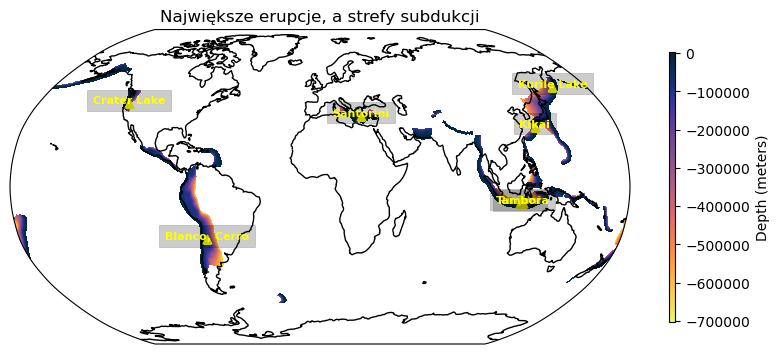

In [3]:
eruptions_data = eruptions_data[['Volcano Name', 'Longitude', 'Latitude']]
unique_eruptions = eruptions_data.drop_duplicates(subset = ['Volcano Name'])
volcano = ['Tambora', 'Rinjani', 'Santorini', 'Blanco, Cerro', 'Kikai', 'Crater Lake', 'Kurile Lake']
selected_eruptions = unique_eruptions[unique_eruptions['Volcano Name'].isin(volcano)]
selected_eruptions = selected_eruptions.rename(columns = {'Volcano Name': 'Volcano'})

subduction_zones = []
for zone in ZONES:
    subduction_zones.append(rh.fetch_slab2(zone))

vmax = max([grid.depth.actual_range[1] for grid in subduction_zones])
vmin = min([grid.depth.actual_range[0] for grid in subduction_zones])

plt.figure(figsize = (10, 5))
ax = plt.axes(projection = ccrs.Robinson())
for grid in subduction_zones:
    pc = grid.depth.plot.pcolormesh(
        cmap = cmocean.cm.thermal_r,
        ax = ax,
        transform = ccrs.PlateCarree(),
        add_colorbar = False,
        vmin = vmin,
        vmax = vmax,
    )
plt.colorbar(
    pc,
    ax = ax,
    label = "Depth (meters)",
    pad = 0.05,
    aspect = 40,
    shrink = 0.7,
    orientation = "vertical",
)
ax.scatter(
   selected_eruptions['Longitude'],
   selected_eruptions['Latitude'],
   s = 40,
   c = 'yellow',
   marker = '^',
   transform = ccrs.PlateCarree(),
   zorder = 3
)
for row in selected_eruptions.itertuples():
    x, y, volcano_name = row.Longitude, row.Latitude, row.Volcano
    label_text = ax.text(x, y, volcano_name, ha = 'center', transform = ccrs.PlateCarree(), fontsize = 8, color = 'yellow', weight = 'bold')
    label_text.set_bbox(dict(facecolor = 'black', alpha = 0.2, edgecolor = 'black', linewidth = 0.5))

ax.set_title("Największe erupcje, a strefy subdukcji")
ax.set_global()
ax.coastlines()
plt.show()

W pierwszym podpunkcie przyglądamy się danym odnośnie wulkanów o największej wartości VEI (dla naszych danych). VEI (Volcanic Explosivity Index) mówi nam o eksplozywności erupcji wulkaniczych. Rzeczywista skala mieści się w granicach od 0 (erupcje nieeksplozywne) do 8 (największe znane w historii erupcje), jednak dla naszych danych z okresu holocenu erupcje o VEI równym 8 nie miały miejsca, stąd brak ich uwzględnienia w "największych erupcjach" czy dalszej analizie danych wulkanicznych. Na powyższej mapie możemy zauważyć, że wysoce eksplozywne erupcje wulkaniczne pokrywają się ze strefami subdukcji zaznaczonymi na mapie. Z teorii wynika, że wulkany znajdujące się w tych strefach są zazwyczaj strome, co sprzyja ich większej ekspozywności, a więc wyższemu współczynnikowi VEI. Jak możemy zauważyć na pierwszej grafice, wszytskie wulkany z analizowanych danych są rozsiane po całej mapie, niekoniecznie w strefach subdukcji, co może potwierdzać nasz wniosek, że aspekt dużej intensywności pokrywa się znacznie z tym ukształtowaniem terenu.

### Najaktywniejsze wulkany

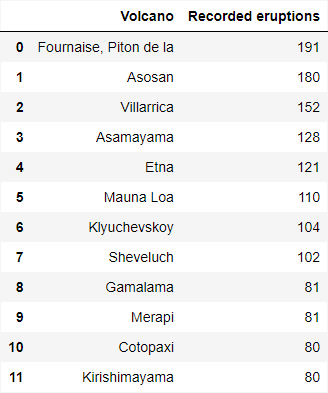

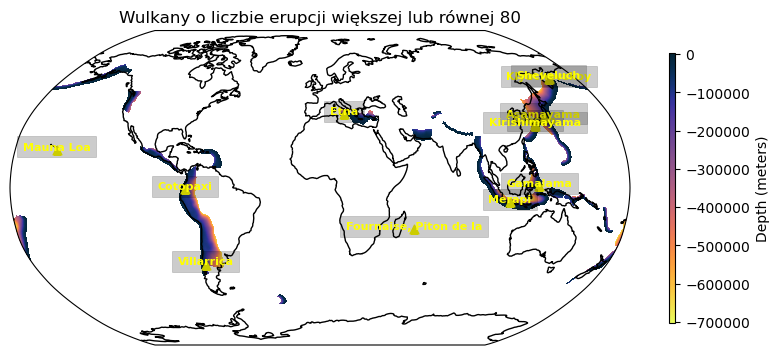

In [4]:
unique_eruptions = eruptions_data.drop_duplicates(subset = ['Volcano Name'])
volcano = ['Fournaise, Piton de la', 'Asosan', 'Villarrica', 'Asamayama', 'Etna', 'Mauna Loa', 'Klyuchevskoy', 'Sheveluch', 'Gamalama', 'Merapi', 'Cotopaxi', 'Kirishimayama']
selected_eruptions = unique_eruptions[unique_eruptions['Volcano Name'].isin(volcano)]
selected_eruptions = selected_eruptions.rename(columns = {'Volcano Name': 'Volcano'})

subduction_zones = []
for zone in ZONES:
    subduction_zones.append(rh.fetch_slab2(zone))

vmax = max([grid.depth.actual_range[1] for grid in subduction_zones])
vmin = min([grid.depth.actual_range[0] for grid in subduction_zones])

plt.figure(figsize = (10, 5))
ax.set_title("Najaktywnijsze wulkany, a strefy subdukcji")
ax = plt.axes(projection = ccrs.Robinson())
for grid in subduction_zones:
    pc = grid.depth.plot.pcolormesh(
        cmap = cmocean.cm.thermal_r,
        ax = ax,
        transform = ccrs.PlateCarree(),
        add_colorbar = False,
        vmin = vmin,
        vmax = vmax,
    )
plt.colorbar(
    pc,
    ax = ax,
    label = "Depth (meters)",
    pad = 0.05,
    aspect = 40,
    shrink = 0.7,
    orientation = "vertical",
)
ax.scatter(
   selected_eruptions['Longitude'],
   selected_eruptions['Latitude'],
   s = 40,
   c = 'yellow',
   marker = '^',
   transform = ccrs.PlateCarree(),
   zorder = 3
)
for row in selected_eruptions.itertuples():
    x, y, volcano_name = row.Longitude, row.Latitude, row.Volcano
    label_text = ax.text(x, y, volcano_name, ha = 'center', transform = ccrs.PlateCarree(), fontsize = 8, color = 'yellow', weight = 'bold')
    label_text.set_bbox(dict(facecolor = 'black', alpha = 0.2, edgecolor = 'black', linewidth = 0.5))

ax.set_title("Wulkany o liczbie erupcji większej lub równej 80")
ax.set_global()
ax.coastlines()
plt.show()

Na powyższej mapie możemy zauważyć, że najaktywniejsze wulkany również znajdują się w większości na stykach płyt tektonicznych, jednak widzimy tu dwa wyjątki. Wulkany Piton de la Fournaise oraz Mauna Loa odbiegają od tej zasady. Można przyjrzeć się więc co wyróznia te dwa wulkany w odniesieniu do innych najaktywniejszych. W odróżnieniu od pozostałych zarówno Piton de la Fournaise jak i Mauna Loa są wulkanami tarczowymi, a więc powstają na skutek powolnego uwalniania lawy z wnętrza ziemi, a ich erupcje są zwykle łagodne i przewidywalne. Możemy potwierdzić to poniższą tabelą danych, gdzie uwzględnimy również średnią wartość VEI dla wszystkich erupcji dla najaktywniejszych wulkanów.

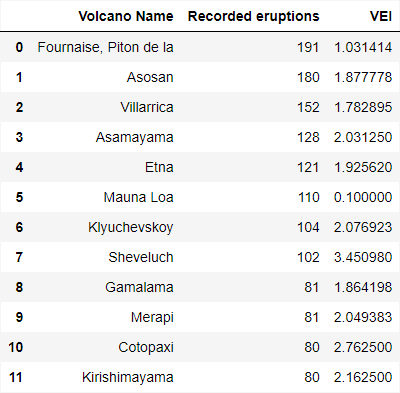

Widzimy, że dla dwóch wulkanów tarczowych wartość eksplozywności erupcji jest znacznie mniejsza niż dla pozostałych, szczególnie dla wulkanu Mauna Loa. Potwierdza to nasze wcześniejsze wnioski, że wulkany o większych wartościcach VEI będą znajdować się zazwyczaj w obrębie stref subdukcji. Wnioksujemy tu też, że sama częstotliwość aktywności wulkanicznej nie musi być z tym powiązana.

### Zliczenia wartości VEI ze względu na kategorię erupcji

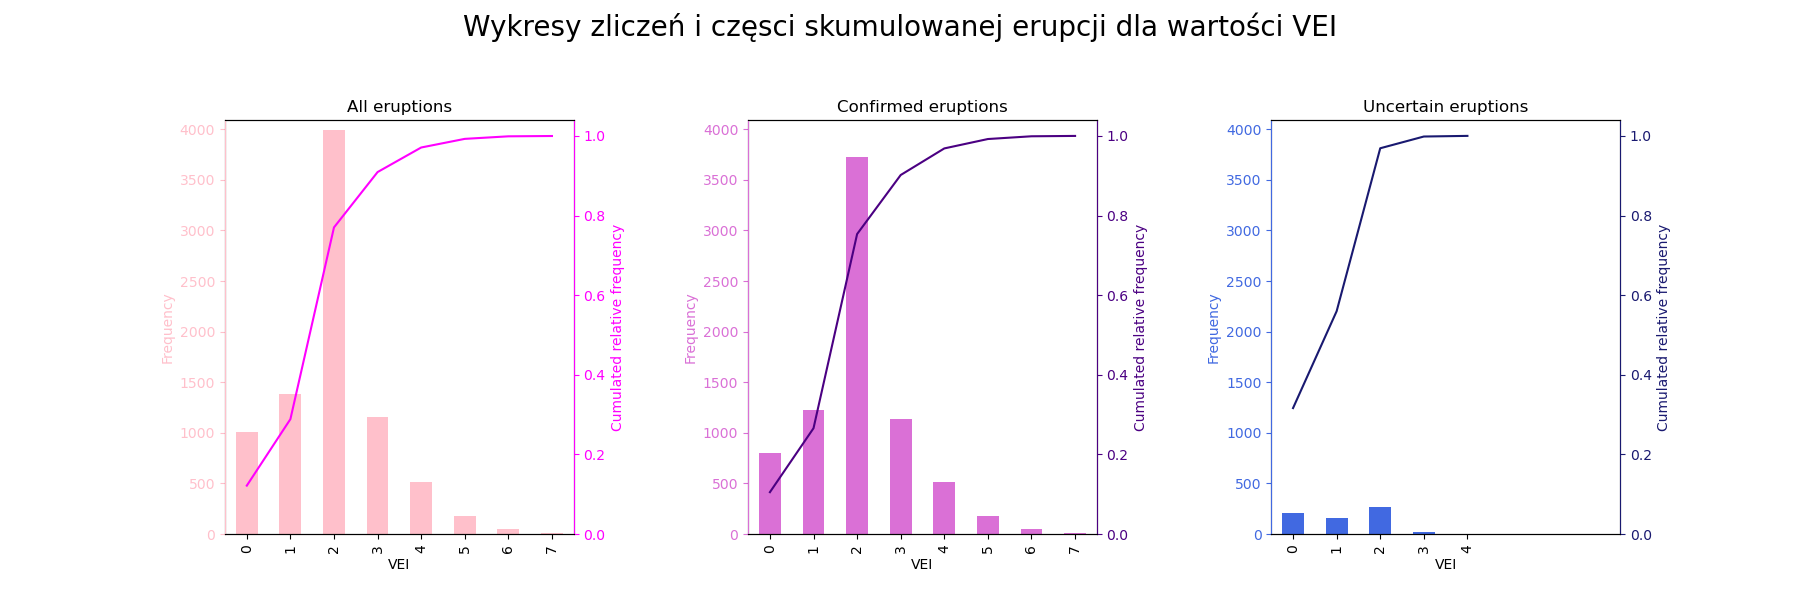

Na wykresach możemy zaobserwować znaczą przewagę liczby erupcji o współczynniku VEI równym 2, a więc tych erupcji, które mają umiarkowany stopnień eksplozywności. Może to wynkiać z wileu czynników, takich jak charakterystyka geologiczna, która może sprzyjać eksplozjom na tym poziomie. Poza tym erupcje o większej intensywności wydają się łatwiejsze do zaobserwowania niż te wartościach VEI równych 0 lub 1. Bardziej eksplozywne erupcje mogą zostawiać po sobie też o wiele bardziej wyrażne ślady. 
Możemy zauwazyć ponadto, że erupcje dla VEI większego od 3 stanowią znaczną mniejszość w całości danych oraz niemal braku takich niepotwierdzonych obserwacji. Wnioskujemy więc że bardziej eksplozywne erupcje są zdecydowanie rzadsze, ale też znacznie trudnijsze do niejednoznacznej oceny. Świadczyć to może o tym, że erupcje o dużym VEI są zazwyczaj bardzo dobrze widoczne i proste do zdefiniowania, co nie zawsze jest, czy przede wszytskim nie zawsze było, tak oczywiste dla wulkanów o średnich lub niskich współczynnkich eksplozywności.

### Rodzaje metod wykrywania erupcji

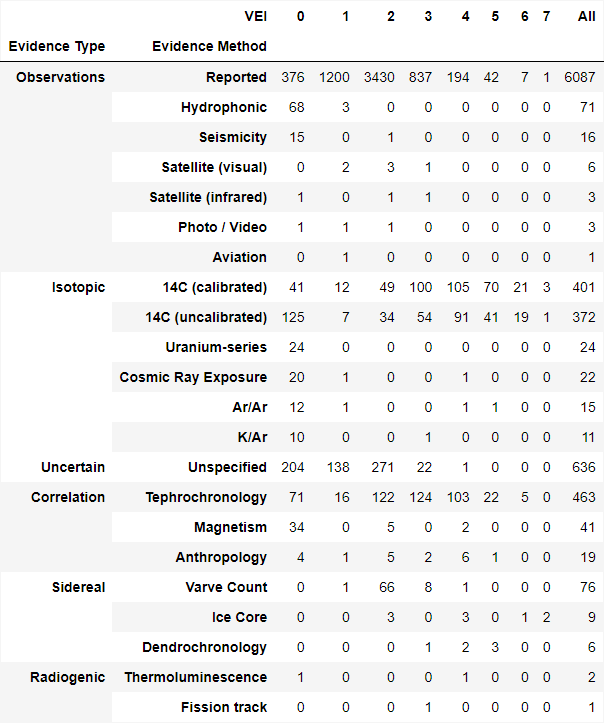

Powyższa tabela przedstawia pogrupowane metody detekcji erupcji wraz z liczbą wybuchów, które zostały za ich pomocą rozpoznane. Jak widać największa ilość erupcji została zarejestrowana metodami obserwacji np. za pomocą bezpośredniej obserwacji, zdjęć satelitarnych, sejsmografów itp. Wydaje się to bardzo logiczny i intuicyjny wniosek, ponieważ przy obecnym stopniu rozwoju nauki i tego jak dokładnie monitorujemy otoczenie, zmiany zachodzące podczas jakiejkolwiek erupcji są bardzo trudne do przeoczenia. Widać, też że najwięcej obserwowanych jest erupcji o średnim VEI. Jest to również logiczny wniosek. Wybuchy o średniej intesywności występują częściej niż te silnijesze i są też łatwiejsze do wykrycia niż na przykład te najsłabsze. Oczywiście wspominany wyżej wniosek tyczy się tylko wąskiego okresu czasu. Kilka tysięcy lat temu nie dysponowaliśmy takim stopniem zaawansowania technologicznego, dlatego dane z wcześniejszych okresów są uzysikwane w inny sposób co prowadzi nas do drugiej najpopularniejszej kategoii detekcji jaką są metody radio-izotopowe. Zgodnie z tabelą posłużyły do wykrycia ponad 800 erupcji (głównie z dawnych czasów). Są one tak popularne ponieważ materiałem używanym do ich przeprowadznia są skały (trwały materiał) i zawarte w nich izotopy o bardzo długich liczonych w milionach lat okresach półtrwania co zapewnia dokładność pomiaru z minimalnym błędem.

### Wizualizacja rozkładu zarejestrowanych erupcji w czasie

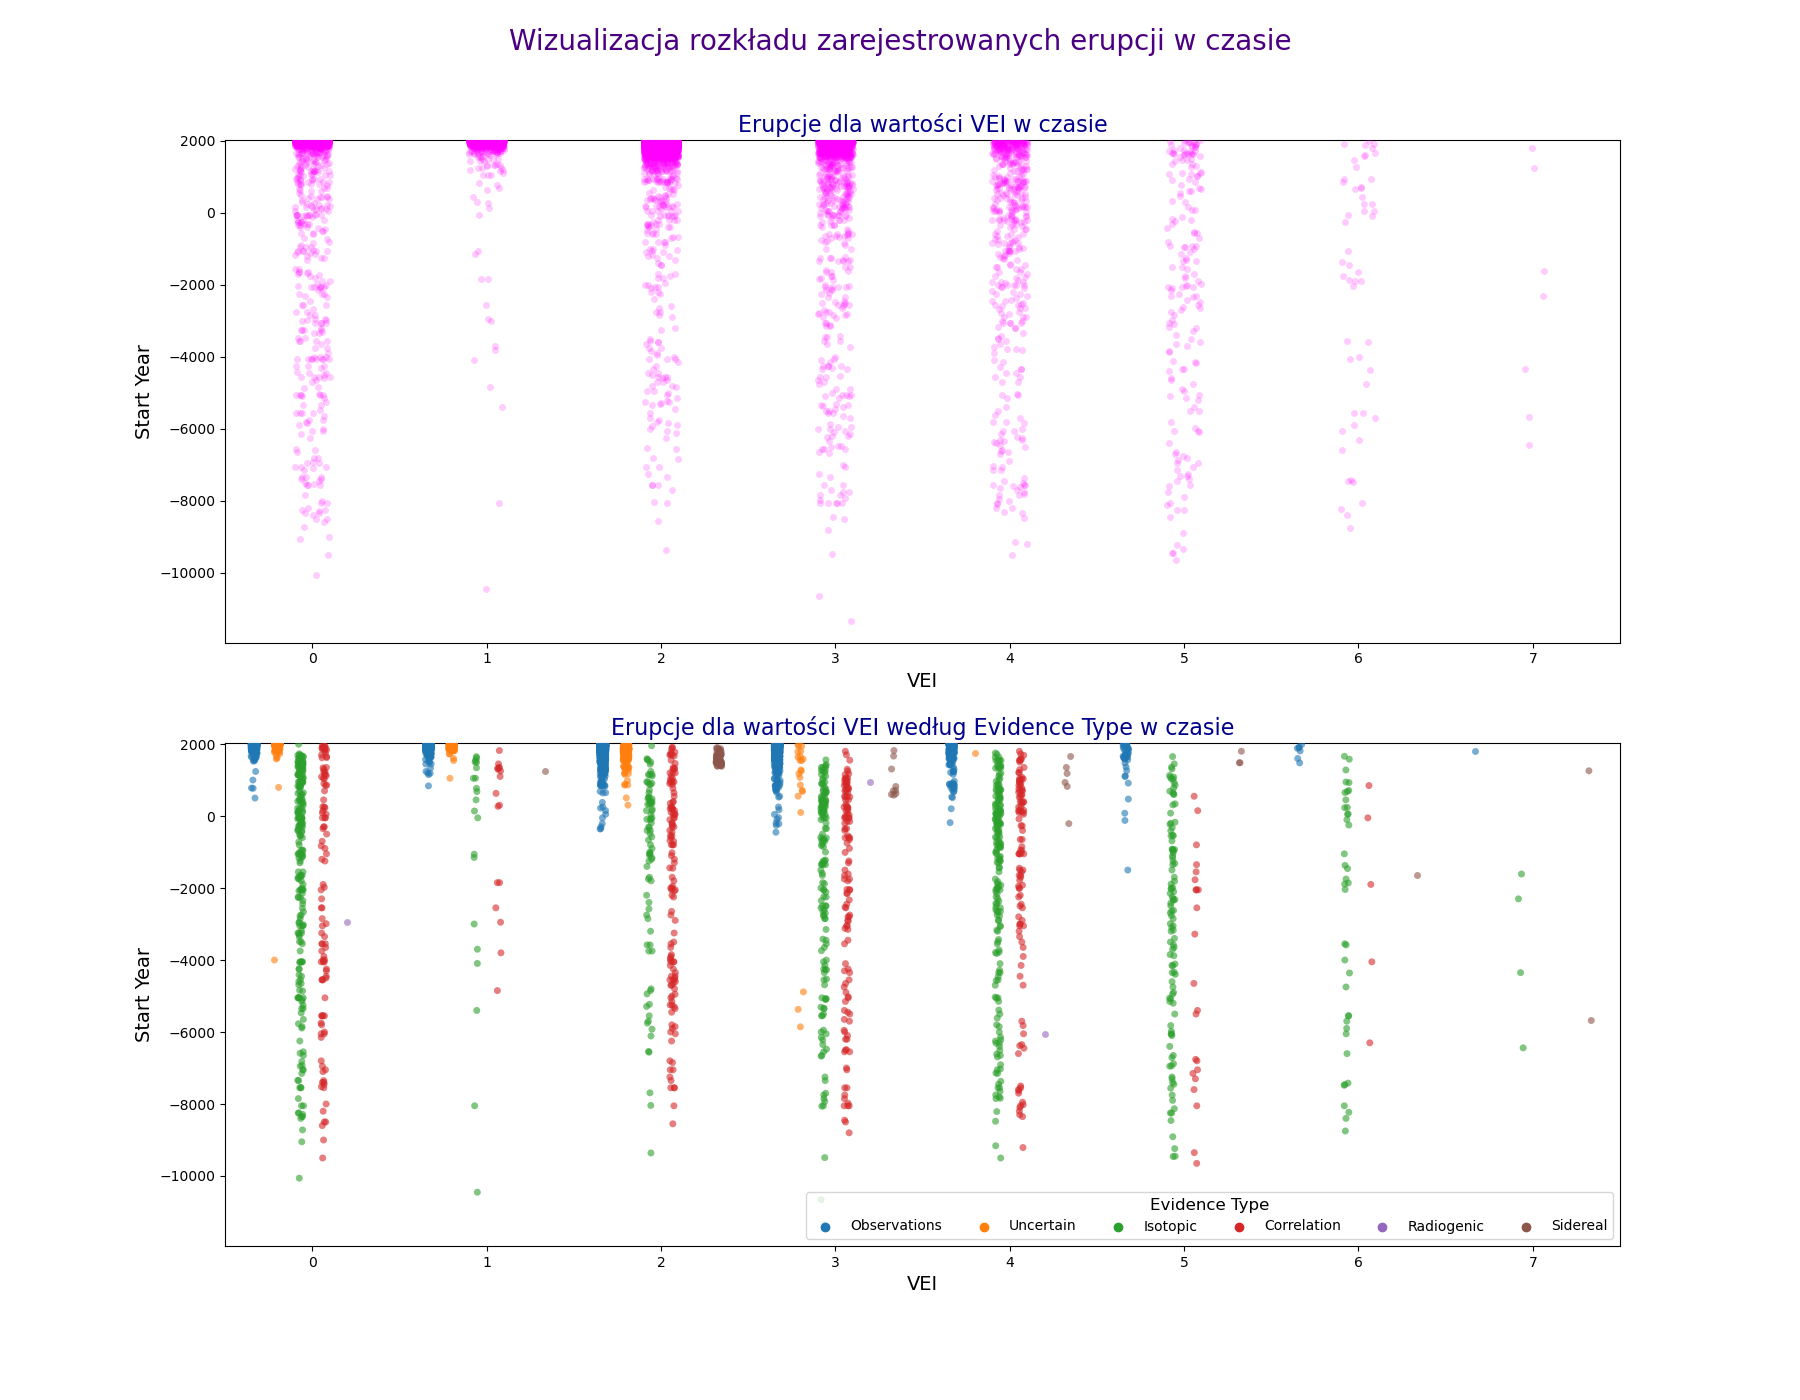

Spoglądając na pierwszy z dwóch załączonych wyżej wykresów, możemy łatwo zaobserwować, że wraz z upływem czasu ilość wykrywanych erupcji dla każdej intensywności ulegała zwiększeniu. Wynika to najprawdopodniej z bardzo prostej przyczyny jaką jest rozwój nauki i narzędzi/metod detekcji na przestrzeni tak wielu lat. Bardzo ładnie widać to również na drugim wykresie, gdzie możemy zauważyć że dane o wybuchach wulkanów spzed kilku tysięcy lat są czerpane wyłącznie za pomocą metod korelacji i izotopowych co wskazuje na to że ówcześni ludzie nie prowadzili zapisków na temat erupcji lub nie mieli narzędzi żeby zbadać wybuchy np. wulkanów podwodnych. Prowadzi to do kolejnego wniosku, że być może kilka tysięcy lat temu erupcje były częstsze lub o podobnym stopniu nasilenia jak obecnie, lecz nie zostały udokumentowane. Na drugim wykresie możemy także zauważyć ciekawą zależność (tylko w niedawnym okresie czasowym) dotycząca tego, że wraz ze wzrostem indeksu eksplozywności wulkanicznej częstszą metodą detekcji są obserwacje i znikają eksplozje które są uważane za niepewne. Jest to prawdopodobnie skutkiem tego, że erupcje powyżej VEI równego 3 są już uważane za kataklizm i zdarzją sie bardzo rzadko np. raz na dekadę lub więcej i są niemożliwe do niezauważenia, a skoro detekcja nastąpiła już jedną z metod to nie ma sensu jej powtarzać inną. Warty uwagi jest także fakt, że większość obecnych wybuchów w większości weryfikujemy metodami obserwacyjnymi, co widać w spadku stosowania metod izotopwych (góra wykresu).

#### Zródła:
Model stref subdukcji:
https://www.fatiando.org/rockhound/dev/gallery/slab2.html